In [1]:
import dask.dataframe as df

## Data downloaded from : https://www.kaggle.com/city-of-seattle/seattle-library-collection-inventory

### Code to load the data and break into manageable csv

In [2]:
# library_df = df.read_csv('library-collection-inventory.csv')
# library_df.to_csv('broken_csvs/libary-part-*.csv')

In [3]:
library_df = df.read_csv('broken_csvs/libary-part-0[0-2]*.csv')

In [4]:
library_df

,Unnamed: 0,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
npartitions=60,,,,,,,,,,,,,,
,int64,int64,object,object,object,object,object,object,object,object,object,object,object,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [5]:
# Currently in 1.2.1 inplace arguement is not supported
library_df = library_df.drop('Unnamed: 0', axis=1)

In [6]:
library_df.head(n=100)

,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
0,3011076,A tale of two friends / adapted by Ellie O'Rya...,"O'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481...",2014.,"Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best ...",jcbk,ncrdr,Floating,qna,2017-09-01T00:00:00.000,1
1,2248846,"Naruto. Vol. 1, Uzumaki Naruto / story and art...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic book...",acbk,nycomic,NaN,lcy,2017-09-01T00:00:00.000,1
2,3209270,"Peace, love & Wi-Fi : a ZITS treasury / by Jer...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.,"Andrews McMeel Publishing,",Duncan Jeremy Fictitious character Comic books...,acbk,nycomic,NaN,bea,2017-09-01T00:00:00.000,1
3,1907265,The Paris pilgrims : a novel / Clancy Carlile.,"Carlile, Clancy, 1930-",0786706155,c1999.,"Carroll & Graf,","Hemingway Ernest 1899 1961 Fiction, Biographic...",acbk,cafic,NaN,cen,2017-09-01T00:00:00.000,1
4,1644616,"Erotic by nature : a celebration of life, of l...",NaN,094020813X,"1991, c1988.","Red Alder Books/Down There Press,","Erotic literature American, American literatur...",acbk,canf,NaN,cen,2017-09-01T00:00:00.000,1
5,1736505,Children of Cambodia's killing fields : memoir...,NaN,"0300068395, 0300078730",c1997.,"Yale University Press,","Political atrocities Cambodia, Children Cambod...",acbk,canf,NaN,cen,2017-09-01T00:00:00.000,1
6,1749492,Anti-Zionism : analytical reflections / editor...,NaN,091559773X,c1989.,"Amana Books,","Berger Elmer 1908 1996, Zionism Controversial ...",acbk,canf,NaN,cen,2017-09-01T00:00:00.000,1
7,3270562,Hard-hearted Highlander / Julia London.,"London, Julia","0373789998, 037380394X, 9780373789993, 9780373...",[2017],"HQN,","Man woman relationships Fiction, Betrothal Fic...",acbk,nanew,NaN,lcy,2017-09-01T00:00:00.000,1
8,3264577,The Sandcastle Empire / Kayla Olson.,"Olson, Kayla","0062484877, 9780062484871",2017.,"HarperTeen,","Survival Juvenile fiction, Islands Juvenile fi...",acbk,nynew,NaN,nga,2017-09-01T00:00:00.000,1
9,3236819,Doctor Who. The return of Doctor Mysterio / BB...,NaN,NaN,[2017],"BBC Worldwide,","Doctor Fictitious character Drama, Time travel...",acdvd,nadvd,Floating,wts,2017-09-01T00:00:00.000,2


In [7]:
import re

def get_year(year_str, *args, **kwargs):
    if isinstance(year_str, str):
        year_list = list(map(lambda x: re.sub(r"\D", "", x), year_str.split(',')))
        return list(map(lambda x: int(x) if x!='' else 0, year_list))
    else:
        return year_str

In [8]:
publication_dates = library_df['PublicationYear'].apply(get_year,
                                                        axis=1,
                                                       meta=('PublicationYear', object))

In [9]:
publication_dates

Dask Series Structure:
npartitions=60
    object
       ...
     ...  
       ...
       ...
Name: PublicationYear, dtype: object
Dask Name: apply, 360 tasks

In [10]:
publication_dates.compute()

0             [2014]
1       [2003, 1999]
2             [2014]
3             [1999]
4       [1991, 1988]
5             [1997]
6             [1989]
7             [2017]
8             [2017]
9             [2017]
10            [2014]
11            [2015]
12            [2006]
13            [2017]
14            [2017]
15            [2015]
16            [2016]
17            [2015]
18            [2016]
19            [2008]
20            [2016]
21            [2000]
22            [1960]
23            [2000]
24            [2014]
25            [2014]
26            [2014]
27            [2005]
28            [2008]
29            [2004]
            ...     
2211          [2016]
2212          [2014]
2213          [1986]
2214          [2013]
2215          [2013]
2216          [2016]
2217          [2017]
2218          [2013]
2219          [2004]
2220    [2014, 2000]
2221          [1999]
2222          [2016]
2223          [2010]
2224          [1985]
2225          [2002]
2226          [1989]
2227         

In [11]:
get_lens = publication_dates.map(lambda x: len(x) if isinstance(x, list) else 0)

In [30]:
get_lens.value_counts().compute()

1    5622813
2     136298
0      67469
3        872
4         21
Name: PublicationYear, dtype: int64

In [13]:
def get_first_published_year(year_list, *args, **kwargs):
    if isinstance(year_list, int):
        if year_list==0:
            return 0
        else:
            return year_list
    elif isinstance(year_list, list):
        return min(year_list)
    else:
        return 0

In [14]:
first_pub_year = publication_dates.apply(
    lambda row: get_first_published_year(row), meta=('PublicationYear', 'int')).astype(int)

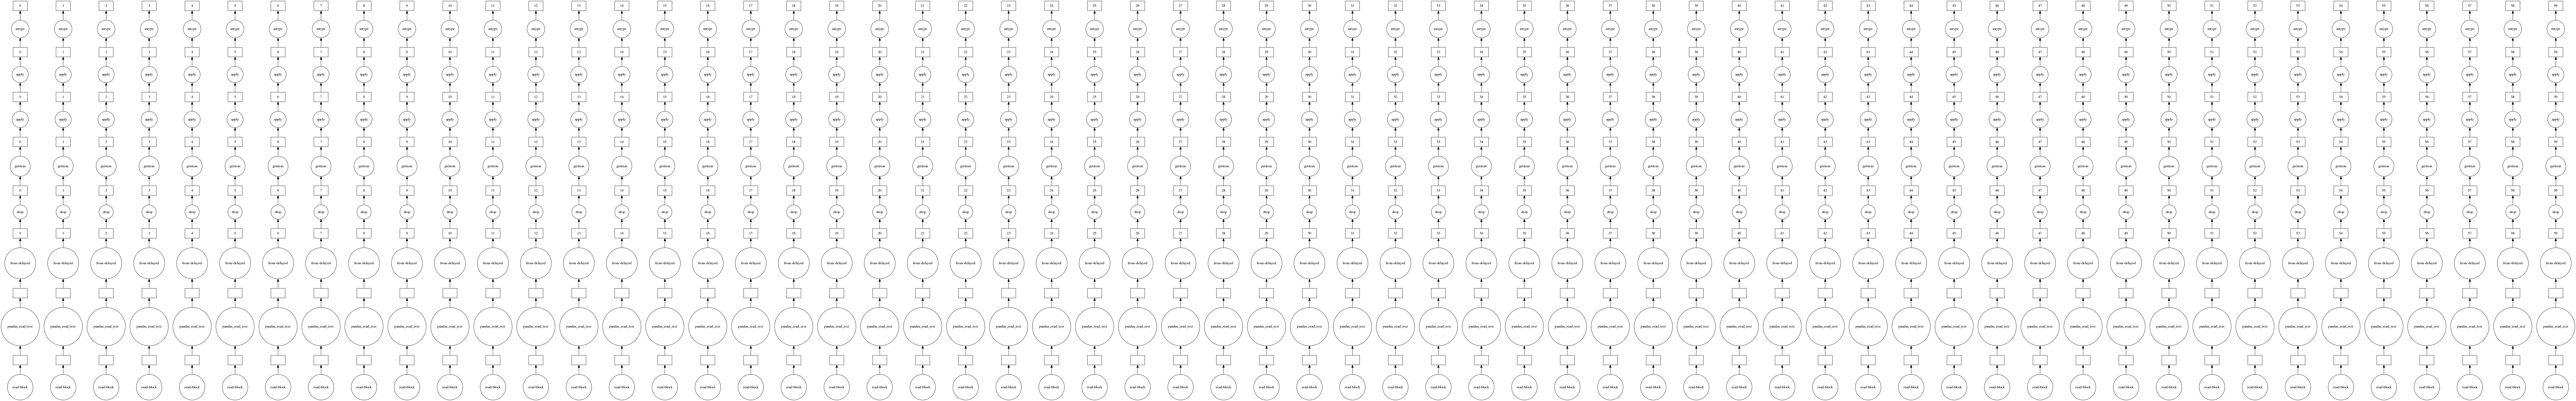

In [31]:
first_pub_year.visualize(filename='pub_year.png')

In [16]:
first_pub_year.compute()

0       2014
1       1999
2       2014
3       1999
4       1988
5       1997
6       1989
7       2017
8       2017
9       2017
10      2014
11      2015
12      2006
13      2017
14      2017
15      2015
16      2016
17      2015
18      2016
19      2008
20      2016
21      2000
22      1960
23      2000
24      2014
25      2014
26      2014
27      2005
28      2008
29      2004
        ... 
2211    2016
2212    2014
2213    1986
2214    2013
2215    2013
2216    2016
2217    2017
2218    2013
2219    2004
2220    2000
2221    1999
2222    2016
2223    2010
2224    1985
2225    2002
2226    1989
2227    1991
2228    2017
2229    2016
2230    2015
2231    2011
2232    1921
2233    2017
2234    2003
2235    2015
2236    2014
2237    1971
2238    2000
2239    1988
2240    2015
Name: PublicationYear, Length: 5827473, dtype: int64

In [17]:
year_count = first_pub_year.value_counts()

In [18]:
year_count.nlargest(50).compute()

2016    629725
2015    551307
2017    492110
2014    452294
2013    410494
2012    342421
2011    285050
2010    253716
2009    214622
2008    186846
2007    136966
2006    117808
2005     99806
2004     90252
2003     81821
2002     76658
0        71106
2001     70331
2000     67451
1999     61377
1998     54755
1997     46257
1996     43817
1995     41533
1994     39101
1993     36381
1991     33458
1992     32923
1990     31323
1989     28426
1987     23231
1988     22863
1986     21269
1985     19759
1984     18568
1976     18074
1982     17279
1972     17219
1981     17218
1983     16743
1971     16738
1977     16662
1970     16481
1975     15832
1980     15720
1973     15555
1968     15421
1969     15367
1974     15223
1978     15016
Name: PublicationYear, dtype: int64

In [19]:
import dask.bag as db

subjects_bag = library_df['Subjects'].to_bag()

In [20]:
subjects_bag.take(10)

('Musicians Fiction, Bullfighters Fiction, Best friends Fiction, Friendship Fiction, Adventure and adventurers Fiction',
 'Ninja Japan Comic books strips etc, Comic books strips etc Japan Translations into English, Graphic novels',
 'Duncan Jeremy Fictitious character Comic books strips etc, Teenagers United States Comic books strips etc, Parent and teenager Comic books strips etc, Families Comic books strips etc, Comic books strips etc, Comics Graphic works, Humorous comics',
 'Hemingway Ernest 1899 1961 Fiction, Biographical fiction, Historical fiction',
 'Erotic literature American, American literature 20th century',
 'Political atrocities Cambodia, Children Cambodia Biography, Cambodia History 1975',
 'Berger Elmer 1908 1996, Zionism Controversial literature',
 'Man woman relationships Fiction, Betrothal Fiction, Governesses Fiction, Highlands Scotland Fiction, Romance fiction, Historical fiction',
 'Survival Juvenile fiction, Islands Juvenile fiction, Dystopias Juvenile fiction, F

In [21]:
flatten_subjects = subjects_bag.map(lambda x: x.split(',')).flatten()

In [22]:
flatten_subjects.take(10)

('Musicians Fiction',
 ' Bullfighters Fiction',
 ' Best friends Fiction',
 ' Friendship Fiction',
 ' Adventure and adventurers Fiction',
 'Ninja Japan Comic books strips etc',
 ' Comic books strips etc Japan Translations into English',
 ' Graphic novels',
 'Duncan Jeremy Fictitious character Comic books strips etc',
 ' Teenagers United States Comic books strips etc')

In [23]:
clean_subjects = flatten_subjects.map(lambda x: x.strip())

In [24]:
clean_subjects.take(10)

('Musicians Fiction',
 'Bullfighters Fiction',
 'Best friends Fiction',
 'Friendship Fiction',
 'Adventure and adventurers Fiction',
 'Ninja Japan Comic books strips etc',
 'Comic books strips etc Japan Translations into English',
 'Graphic novels',
 'Duncan Jeremy Fictitious character Comic books strips etc',
 'Teenagers United States Comic books strips etc')

In [25]:
freq_subjects = clean_subjects.frequencies()

In [26]:
freq_subjects.compute()

AttributeError: 'float' object has no attribute 'split'

In [27]:
remove_nan = subjects_bag.filter(lambda x: isinstance(x, str))
flatten_subjects = remove_nan.map(lambda x: x.split(',')).flatten()
clean_subjects = flatten_subjects.map(lambda x: x.strip())
freq_subjects = clean_subjects.frequencies()

In [28]:
freq_subjects.take(10)

(('Musicians Fiction', 1653),
 ('Bullfighters Fiction', 99),
 ('Best friends Fiction', 13368),
 ('Friendship Fiction', 87974),
 ('Adventure and adventurers Fiction', 28428),
 ('Ninja Japan Comic books strips etc', 682),
 ('Comic books strips etc Japan Translations into English', 9107),
 ('Graphic novels', 209787),
 ('Duncan Jeremy Fictitious character Comic books strips etc', 22),
 ('Teenagers United States Comic books strips etc', 59))

In [29]:
remove_nan.take(5)

('Musicians Fiction, Bullfighters Fiction, Best friends Fiction, Friendship Fiction, Adventure and adventurers Fiction',
 'Ninja Japan Comic books strips etc, Comic books strips etc Japan Translations into English, Graphic novels',
 'Duncan Jeremy Fictitious character Comic books strips etc, Teenagers United States Comic books strips etc, Parent and teenager Comic books strips etc, Families Comic books strips etc, Comic books strips etc, Comics Graphic works, Humorous comics',
 'Hemingway Ernest 1899 1961 Fiction, Biographical fiction, Historical fiction',
 'Erotic literature American, American literature 20th century')